<a href="https://colab.research.google.com/github/OlhaZahrebelna/my_practis_on_github/blob/main/Zahrebelna_Olha_%22hw_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

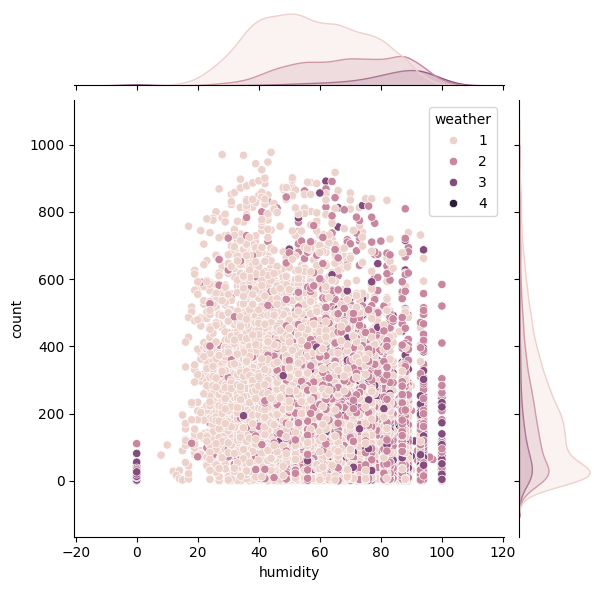

In [ ]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather');

Ми бачимо, що на графіку розсіювання переважають дані, пов'язані з теплою погодою. Найбільші значення кількості орендованих велосипедів спостерігаються при комфортній температурі. Це може бути наслідком того, що тепла погода є найбільш поширеною в цій місцевості та що вона спонукає людей більше орендувати велосипеди. Також можна помітити, що зі збільшенням вологості зростає ймовірність опадів, що може впливати на зменшення кількості оренд. Оскільки ця динаміка є природною закономірністю, можна впевнено стверджувати, що дані були введені правильно, там де збільшенням вологості зростає кількість опадів.

Користь

Планування ресурсів:

Планувати попит на оренду залежно від погодних умов.
Розташовувати велосипеди в містах із більш сприятливими погодними умовами (якщо компанія працює в різних містах).
Передбачати піки активності у високий сезон та планувати достатню кількість ресурсів.

Маркетингові кампанії:

Стимулювати оренду під час несприятливої погоди через спеціальні акції чи знижки.
Розробити кампанії, орієнтовані на популяризацію оренди у міжсезоння або під час менш сприятливих погодних умов.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

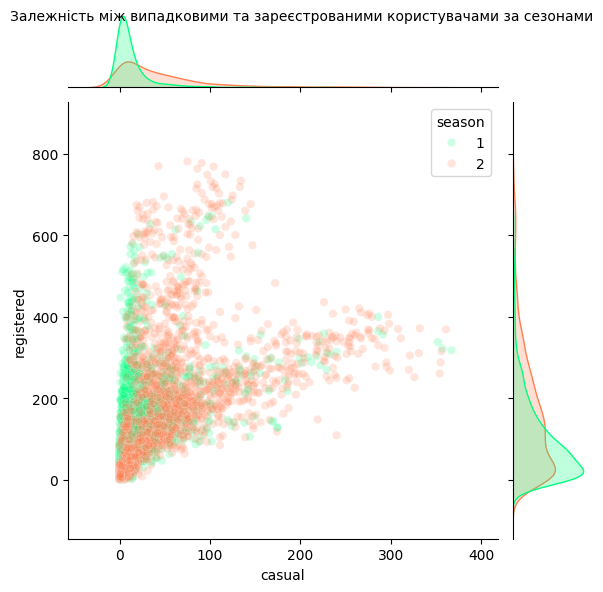

In [ ]:
sum_spr_df = df[(df.season == 1) | (df.season == 2)]
custom_palette = { 1: 'springgreen', 2: 'coral'}
sns.jointplot(data=sum_spr_df, x='casual', y='registered', hue='season', alpha=.2, palette=custom_palette)
plt.suptitle('Залежність між випадковими та зареєстрованими користувачами за сезонами', fontsize=10);


Ми бачимо скупчення в нижньому лівому куті, що свідчить про велику кількість даних із низьким попитом на велосипеди. Необхідно профільтрувати дані та виключити нічні години, або провести аналіз по годинах, щоб побачити, як змінюється попит протягом дня. Ми можемо побачити, чи є залежність від часу. Допоможе оптимізовувати ресурси.

Також ми бачимо, що на графіку домінують точки з літа та зареєстровані клієнти. Це свідчить про те, що влітку попит на велосипеди вищий, що дозволяє ефективніше використовувати ресурси. Домінування постійних клієнтів вказує на успішну систему залучення та утримання користувачів. Крім того, спостерігаємо, що навесні кількість зареєстрованих клієнтів також перевищує кількість незареєстрованих, що підтверджує активну участь постійних користувачів у цей сезон.

In [ ]:
df['datetime'] = pd.to_datetime(df.datetime)
df['time'] = df['datetime'].dt.time
depend_time = df.groupby('time')['count'].sum().reset_index()


,time,count
0,00:00:00,25088
1,01:00:00,15372
2,02:00:00,10259
3,03:00:00,5091
4,04:00:00,2832
5,05:00:00,8935
6,06:00:00,34698
7,07:00:00,96968
8,08:00:00,165060
9,09:00:00,100910


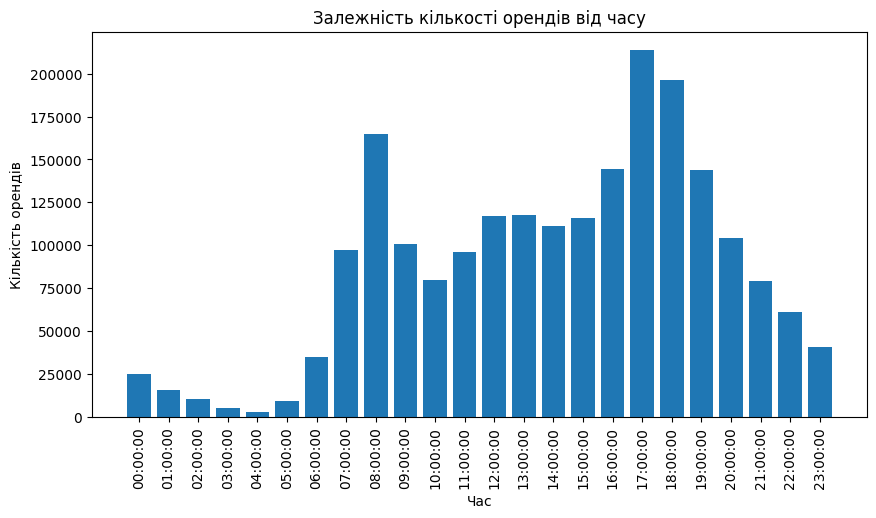

In [ ]:
depend_time['time_str'] = depend_time['time'].astype(str)

fig = plt.figure(figsize=(10,5))
plt.bar(depend_time['time_str'], depend_time['count'])
plt.xticks(rotation=90)
plt.xlabel('Час')
plt.ylabel('Кількість орендів')
plt.title('Залежність кількості орендів від часу');

Ми можемо побачити час з низкою арендою це між 00:00 та 6:00

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


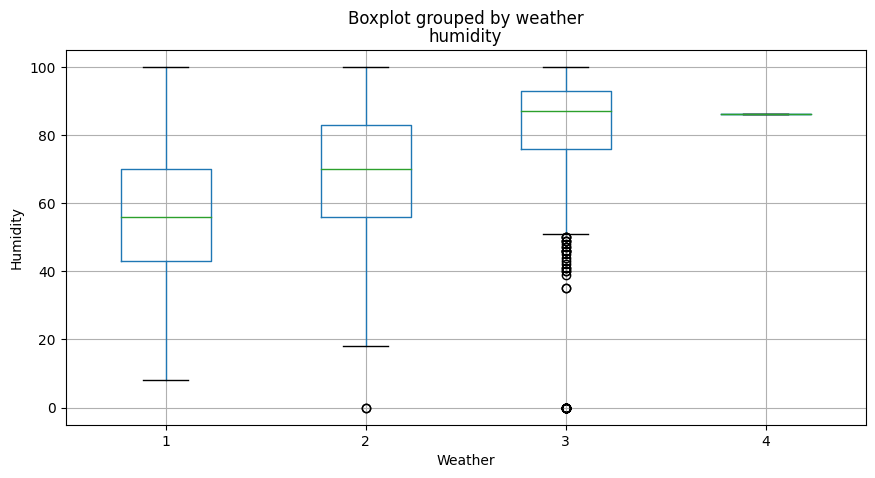

In [44]:
df.boxplot(column='humidity', by='weather', figsize=(10,5))
plt.xlabel('Weather')
plt.ylabel('Humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

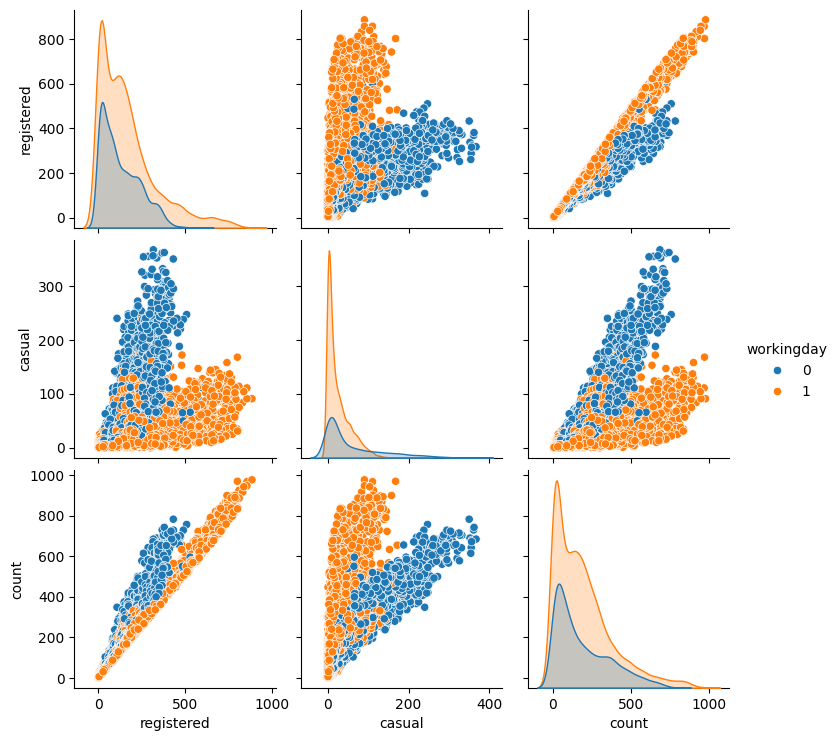

In [47]:
df_pair = df[['registered', 'casual', 'count', 'workingday']]
sns.pairplot(df_pair, hue='workingday');

Ми можемо помітити, що у робочі дні кількість орендованих велосипедів значно більша, ніж у святкові дні. Це свідчить про те, що в будні дні попит на оренду вищий через те, що люди використовують велосипеди для щоденних поїздок на роботу чи інші справи.

У святкові дні спостерігається зростання кількості не зареєстрованих користувачів, що може вказувати на те, що туристи або люди, які рідко використовують велосипеди, частіше беруть їх у святковий час.

Кількість зареєстрованих клієнтів зростає разом із загальною кількістю орендарів, тоді як кількість не зареєстрованих клієнтів у робочі дні не показує такого значного зростання.

Висновки:

У робочі дні переважають оренди серед зареєстрованих користувачів.
Святкові дні приваблюють більше не зареєстрованих користувачів.
Для збільшення кількості орендарів у святкові дні можна фокусувати маркетингові стратегії на залученні тимчасових або туристичних клієнтів.

робочий  1,  вихідний 0.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [48]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [49]:
df['date'] = df.datetime.dt.date

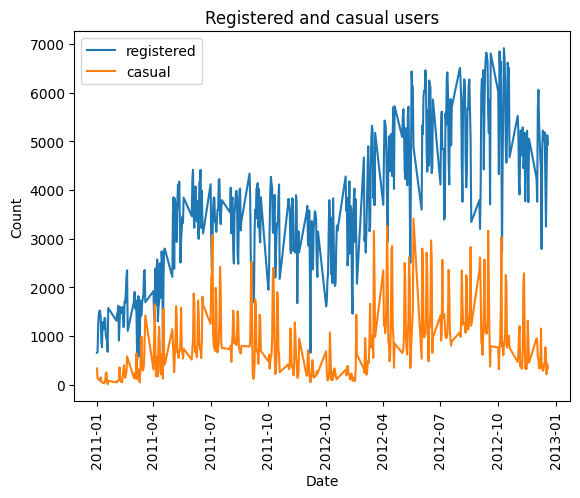

In [52]:
df_viz = df[['date', 'registered', 'casual']]
df_viz = df_viz.groupby('date').sum()
df_viz.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Registered and casual users');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)


Ми спостерігаємо зростання кількості оренд з травня по жовтень, що свідчить про сезонність попиту. Це період, коли погодні умови сприяють більш активному користуванню велосипедами. Також видно, що загальна кількість клієнтів постійно зростає, що вказує на ефективність фірми у залученні нових користувачів та стимулюванні попиту на послуги оренди велосипедів.

Висновки:

Яскраво виражена сезонність у використанні велосипедів з піковими значеннями в теплі місяці.
Постійне зростання кількості клієнтів є показником успішної стратегії залучення та утримання клієнтів.